<h1 style="text-align:center">Advanced Statistical Inference</h1>
<h1 style="text-align:center">Bayesian Logistic Regression - Metropolis-Hastings</h1>



## 1. Aims
<div class="alert alert-info">
<ul> 
<li> To implement the MH algorithm.
<li> To use it to compute classification probabilities.
</ul>
</div>

## 2. Metropolis-Hastings
<div class="alert alert-info">
In this lab, you’re going to implement the Metropolis-Hasting algorithm described in the lecture.
Use the binary classification data `binaryclass2.mat` and the function `laplacecomp()`. If you
pass this function a 2-dimensional $w$ vector, it will return $g(w; X, t, \sigma^2)$ and $log(g(w; X, t, \sigma^2))$.
(Remember that $g(w; X, t, \sigma^2) \propto p(w|X, t, \sigma^2)$, the posterior density of interest.)
</div>

In [1]:
import scipy.io
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
mat = scipy.io.loadmat('data/binaryclass2.mat')

In [2]:
X = mat['X']
t = mat['t']

In [3]:
print('X len: ', len(X))
print('t len:', len(t))
print('X shape:', X.shape)
print('t shape:', t.shape)

X len:  100
t len: 100
X shape: (100, 2)
t shape: (100, 1)


<div class="alert alert-info">
Visualise the data using a scatter plot.
</div>

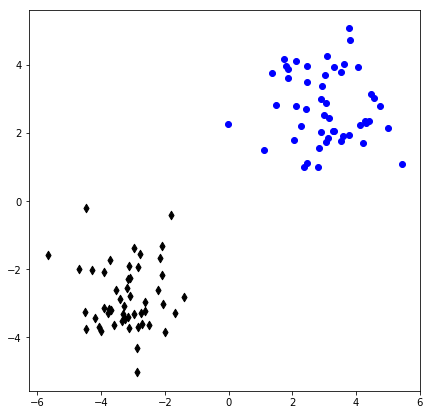

In [4]:
fig = plt.figure(figsize=(7,7))
c1 = X[t[:,0]==1]
c2 = X[t[:,0]==0]
plt.scatter(c1[:,0], c1[:,1], c='b')
plt.scatter(c2[:,0], c2[:,1], c='black', marker='d')
plt.show()

<div class="alert alert-info">
Make sure `laplacecomp()` works by passing it some different $w$ vectors ($w$ needs to have
dimension 2×1).</div>

In [5]:
def laplacecomp(w,X,t):
    """This function computes g and log(g) for the laplace model introduced in the lecture."""
    w = np.array(w)
    X = np.array(X)
    t = np.array(t)
    ss = 10 # Prior variance (sigma squared)
    # Evaluate log prior
    log_g = -(1/(2*ss))*w.T.dot(w)
    # Compute P
    P = 1/(1+np.exp(-X.dot(w)))
    log_l = np.sum(t*np.log(P) + (1-t)*(np.log(1-P)))
    log_g = log_g + log_l
    g = np.exp(log_g)
    return g[0][0], log_g[0][0]

In [6]:
w = np.random.randn(2,1)
laplacecomp(w, X, t)

(1.0670982284210014e-65, -149.60308801615483)

<div class="alert alert-info">

Implement the MH algorithm (see the flowchart in the slides). 
<br>
You might find it safest to work with $log(g)$ – the ratio then becomes a subtraction that must then be exponentiated. This has more numerical stability, especially when $w$ isn’t very good. You can start with any value of $w$. E.g., $w = randn(2,1)$. Also, use a Gaussian proposal: For example: $wp = randn(2,1)*0.5+w$ where $w$ is the current sample and $wp$ is the proposal and the Gaussian has standard deviation $0.5$ (set this as you please).
</div>

In [7]:
def MH(X, t, numSamples):

    s=0
    w = np.random.randn(2,1)
    
    ws = [w]
    
    while s < numSamples:
        
        s+=1
        wp = np.random.randn(2,1)*0.5 + w

        g, log_g = laplacecomp(w, X, t)
        gp, log_gp = laplacecomp(wp, X, t)

        r = np.exp(log_gp - log_g)

        if r>=1:
            w = wp
        else:
            u = np.random.uniform()
            if u<=r:
                w = wp
                
        ws.append(w)
    ws = np.array(ws)
                
    return ws
        

<div class="alert alert-info">
Draw samples from your MH algorithm and plot the distribution of values obtained.
</div>

In [8]:
numSamples = 100
w_samples = MH(X,t, numSamples)

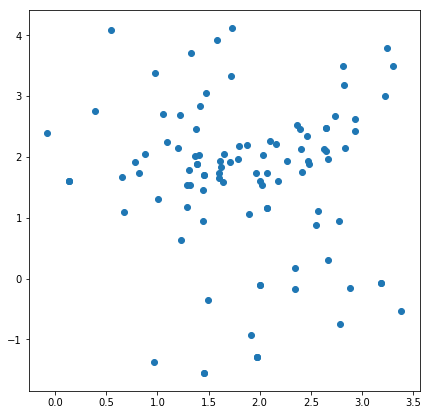

In [9]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(w_samples[:,0], w_samples[:,1], )
plt.show()

<div class="alert alert-info">
Compute the probability $P (t_{new} = 1 | x_{new} , X, t)$ when $x_{new} = [2,-4]^T$ . 
<br>
Hint – compute the probability for each value of $w$ using:
$$ \dfrac{1}{1+\exp(-w^T x_{new})} $$
</div>

In [10]:
def predict(samples, x_new):
    p = 0
    
    for w in samples:
        p += 1/(1+np.exp(-x_new.dot(w)))
        
    return p/len(samples)

In [11]:
x_new = np.array([2, -4])
p = predict(w_samples, x_new)

<div class="alert alert-success">
Create a contour plot over the given range of values, while also showing the prediction for ${x_{new}}$.
</div>

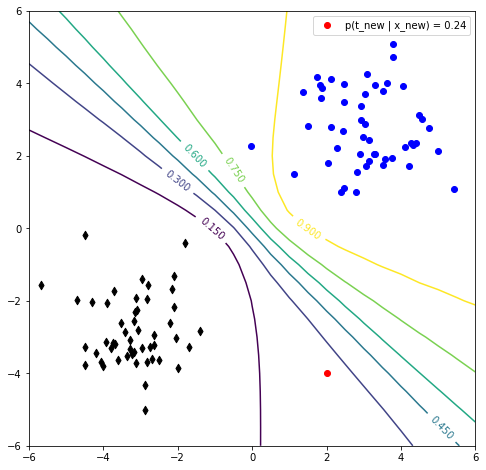

In [12]:
x1min, x1max, x1step = (-6, 6.5, 0.5)
x2min, x2max, x2step = (-6, 6.5, 0.5)
x1_range = np.arange(x1min, x1max, x1step)
x2_range = np.arange(x2min, x2max, x2step)

X1, X2 = np.meshgrid(x1_range, x2_range)

fig = plt.figure(figsize=(8,8))
CS = plt.contour(X1, X2, np.squeeze(predict(w_samples, np.array([X1,X2]).T)).T)
plt.clabel(CS, inline=1, fontsize=10)

plt.scatter(x_new[0], x_new[1], label='p(t_new | x_new) = {:.2f}'.format(p[0]), c='r')
plt.scatter(c1[:,0], c1[:,1], c='b')
plt.scatter(c2[:,0], c2[:,1], c='black', marker='d')
plt.legend()
plt.show()